Feed images -> BLIP -> embed the caption from BLIP -> concatenate -> PCA -> kmeans
#idk what im doing anymore, this is just a test file

In [2]:
from mushroom import *

C:\Users\Athena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Athena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\amp\autocast_mode.py:270: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
Loading pipeline components...: 100%|██████████| 9/9 [00:17<00:00,  1.99s/it]
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Pleas

1. fly_agaric and funeral_bell

In [15]:
folder = "mushrooms/fly_agaric"
folder2 = "mushrooms/funeral_bell"

fa_image_paths = []
fb_image_paths = []

for filename in os.listdir(folder):
    if filename.lower().endswith((".png")):
        full_path = os.path.join(folder, filename)
        fa_image_paths.append(full_path)

for filename in os.listdir(folder2):
    if filename.lower().endswith((".png")):
        full_path = os.path.join(folder2, filename)
        fb_image_paths.append(full_path)

fly_agaric_captions = caption_images(fa_image_paths)
funeral_bell_captions = caption_images(fb_image_paths)





In [16]:
print(fly_agaric_captions)
print(funeral_bell_captions)

['a close up of a mushroom in the grass', 'a group of mushrooms sitting on the ground', 'a close up of a mushroom on the ground', 'a couple of mushrooms sitting on top of a forest floor', 'a close up of a red mushroom on the ground', 'a close up of a piece of food on the ground', 'a red mushroom sitting on the ground', 'a close up of a mushroom in the grass', 'a red and white mushroom sitting on the ground', 'a close up of a mushroom on the ground', 'a close up of a mushroom covered in moss', 'a group of mushrooms sitting on the ground', 'a close up of a mushroom on the ground', 'a close up of a mushroom on the ground', 'a couple of mushrooms sitting on the ground']
['a couple of mushrooms sitting on top of a tree stump', 'a group of mushrooms growing on the side of a rock', 'two mushrooms sitting on top of a tree stump', 'a mushroom sitting on top of a moss covered ground', 'two mushrooms sitting on the ground next to each other mushrooms', 'a yellow mushroom sitting on top of a moss 

embed

In [ ]:
#CLIP embed the images AND BLIP captions 
fa_img_embs = embed_images(fa_image_paths) 
fa_txt_embs = embed_texts(fly_agaric_captions)  

In [17]:
fb_img_embs = embed_images(fb_image_paths)
fb_txt_embs = embed_texts(funeral_bell_captions)

concatenate


In [ ]:
#embed fly agaric
fa_img_embs = torch.nn.functional.normalize(fa_img_embs, dim=-1)
fa_txt_embs = torch.nn.functional.normalize(fa_txt_embs, dim=-1)

fa_combined_embed = combine_embeds(fa_img_embs, fa_txt_embs)

#embed funeral bell
fb_img_embs = torch.nn.functional.normalize(fb_img_embs, dim=-1)
fb_txt_embs = torch.nn.functional.normalize(fb_txt_embs, dim=-1)

fb_combined_embed = combine_embeds(fb_img_embs, fb_txt_embs)


pair_embed = np.vstack([fa_combined_embed, fb_combined_embed])


PCA + kmeans

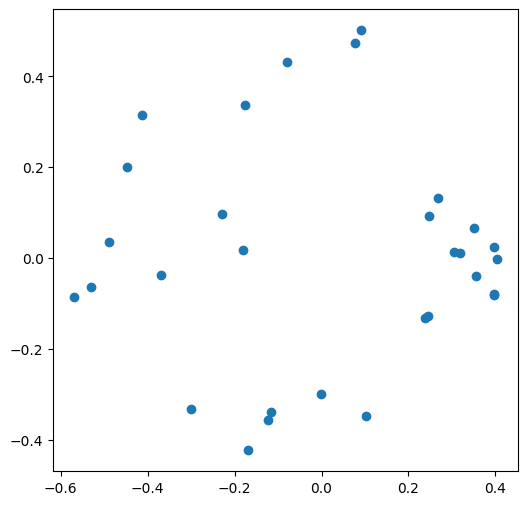

In [24]:
reduced, pca = run_pca(pair_embed)
plot_pca_2d(reduced)

In [25]:
cluster(pair_embed)

(array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 1], dtype=int32),
 KMeans(n_clusters=2, random_state=42))

ok im tired ill come back to this later